In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import lxml
from bs4 import BeautifulSoup 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from nltk.corpus import stopwords
from sklearn.ensemble import RandomForestClassifier


In [2]:
data = pd.read_csv('flipkart_reviews_dataset.csv')

In [3]:
data.head()

product_id                                      product_title  \
0  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   

   rating            summary  \
0       5  Terrific purchase   
1       5  Terrific purchase   
2       5             Super!   
3       5             Super!   
4       5  Terrific purchase   

                                              review       location  \
0  1-more flexible2-bass is very high3-sound clar...        Shirala   
1     Super sound and good looking I like that prize  Visakhapatnam   
2  Very much satisfied with the device at this pr...      Kozhikode   
3  Nice headphone, bass was very good and sound i...          Jaora   
4  Sound quality super battery backup super quali...      New Delhi   

           date  upvotes  downvotes  
0  8 months ago     1390        276  
1  8 months ago      643        133  
2     Feb, 2020     1449        328  
3  7 months ago      160         28  
4  8 months ago      533        114

In [4]:
data

product_id                                      product_title  \
0     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4     ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
...                ...                                                ...   
9369  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9370  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9371  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9372  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   
9373  ACCEVQZABYWJHRHF                   BoAt BassHeads 100 Wired Headset   

      rating               summary  \
0          5     Terrific purchase   
1          5     Terrific purchase   
2          5                Super!   
3          5                Super!   
4          5     Terrific purchase   
...      ...                   ...   
9369       4  Good quality product   
9370       5               Awesome   
9371       4           Really Nice   
9372       5                Super!   
9373       5             Fabulous!   

                                                 review         location  \
0     1-more flexible2-bass is very high3-sound clar...          Shirala   
1        Super sound and good looking I like that prize    Visakhapatnam   
2     Very much satisfied with the device at this pr...        Kozhikode   
3     Nice headphone, bass was very good and sound i...            Jaora   
4     Sound quality super battery backup super quali...        New Delhi   
...                                                 ...              ...   
9369  this head phnes give good base in pluged ears ...       Bhimavaram   
9370  This so far is one of the best headphones I've...        Ettimadai   
9371  I am a BASS LOVER and all others like me read ...  Guntur District   
9372  After use of one month........ It is an excell...    Kothamangalam   
9373  Excellent quality. it works so good. super hap...           Rampur   

              date  upvotes  downvotes  
0     8 months ago     1390        276  
1     8 months ago      643        133  
2        Feb, 2020     1449        328  
3     7 months ago      160         28  
4     8 months ago      533        114  
...            ...      ...        ...  
9369     Apr, 2018        0          0  
9370     Apr, 2018        0          0  
9371     Apr, 2018        0          0  
9372     Apr, 2018        0          0  
9373     Apr, 2018        0          0  

[9374 rows x 9 columns]

In [5]:
pd.set_option('display.max_rows',None)
data.head(5)

product_id                                      product_title  \
0  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
1  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   

   rating            summary  \
0       5  Terrific purchase   
1       5  Terrific purchase   
2       5             Super!   
3       5             Super!   
4       5  Terrific purchase   

                                              review       location  \
0  1-more flexible2-bass is very high3-sound clar...        Shirala   
1     Super sound and good looking I like that prize  Visakhapatnam   
2  Very much satisfied with the device at this pr...      Kozhikode   
3  Nice headphone, bass was very good and sound i...          Jaora   
4  Sound quality super battery backup super quali...      New Delhi   

           date  upvotes  downvotes  
0  8 months ago     1390        276  
1  8 months ago      643        133  
2     Feb, 2020     1449        328  
3  7 months ago      160         28  
4  8 months ago      533        114

In [6]:
data.index = data.index +1

In [7]:
data.head(5)

product_id                                      product_title  \
1  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
2  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
3  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
4  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   
5  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   

   rating            summary  \
1       5  Terrific purchase   
2       5  Terrific purchase   
3       5             Super!   
4       5             Super!   
5       5  Terrific purchase   

                                              review       location  \
1  1-more flexible2-bass is very high3-sound clar...        Shirala   
2     Super sound and good looking I like that prize  Visakhapatnam   
3  Very much satisfied with the device at this pr...      Kozhikode   
4  Nice headphone, bass was very good and sound i...          Jaora   
5  Sound quality super battery backup super quali...      New Delhi   

           date  upvotes  downvotes  
1  8 months ago     1390        276  
2  8 months ago      643        133  
3     Feb, 2020     1449        328  
4  7 months ago      160         28  
5  8 months ago      533        114

In [8]:
data.columns

Index(['product_id', 'product_title', 'rating', 'summary', 'review',
       'location', 'date', 'upvotes', 'downvotes'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9374 entries, 1 to 9374
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     9374 non-null   object
 1   product_title  9374 non-null   object
 2   rating         9374 non-null   int64 
 3   summary        9374 non-null   object
 4   review         9374 non-null   object
 5   location       8081 non-null   object
 6   date           9374 non-null   object
 7   upvotes        9374 non-null   int64 
 8   downvotes      9374 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 659.2+ KB


In [10]:
data.describe()

rating      upvotes    downvotes
count  9374.000000  9374.000000  9374.000000
mean      4.094623     8.102731     1.911457
std       1.345756   102.296230    15.389562
min       1.000000     0.000000     0.000000
25%       4.000000     0.000000     0.000000
50%       5.000000     0.000000     0.000000
75%       5.000000     1.000000     0.000000
max       5.000000  7611.000000   435.000000

In [11]:
data.isnull().sum()

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64

In [12]:
data['review']

1       1-more flexible2-bass is very high3-sound clar...
2          Super sound and good looking I like that prize
3       Very much satisfied with the device at this pr...
4       Nice headphone, bass was very good and sound i...
5       Sound quality super battery backup super quali...
6       Wowwww it's amezing bluetooth nice look, nice ...
7       Awesome colour! Amazing experience .. but only...
8       For the first time, I am posting a review, jus...
9       First of all the Delivery boy is a good guy. N...
10      This headphone is good but not that much as i ...
11      It's a very good product ... I'm so happy with...
12      Nice build quality.. bass is best it self.. vi...
13      After using for about 8 days, right side of th...
14      Mic is not proper recipient persons can't hear...
15      Wow flip cart super fast service like  express...
16      Very great product at this price I will assure...
17      It's very good and its bass is very high This ...
18      Good p

In [13]:
data['length'] = data['review'].apply(len)

In [14]:
data.head(1)

product_id                                      product_title  \
1  ACCFZGAQJGYCYDCM  BoAt Rockerz 235v2 with ASAP charging Version ...   

   rating            summary  \
1       5  Terrific purchase   

                                              review location          date  \
1  1-more flexible2-bass is very high3-sound clar...  Shirala  8 months ago   

   upvotes  downvotes  length  
1     1390        276     493

In [15]:
data['product_title'].unique()

array(['BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset',
       'realme Buds Wireless Bluetooth Headset',
       'OnePlus Bullets Wireless Z Bluetooth Headset',
       'realme Buds 2 Wired Headset',
       'OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset',
       'realme Buds Q Bluetooth Headset',
       'U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset',
       'BoAt Airdopes 131 Bluetooth Headset',
       'BoAt BassHeads 100 Wired Headset'], dtype=object)

In [16]:
data.columns

Index(['product_id', 'product_title', 'rating', 'summary', 'review',
       'location', 'date', 'upvotes', 'downvotes', 'length'],
      dtype='object')

In [17]:
data = data.drop(['product_id','location','date','length',], axis=1)

In [18]:
data.head(5)

product_title  rating  \
1  BoAt Rockerz 235v2 with ASAP charging Version ...       5   
2  BoAt Rockerz 235v2 with ASAP charging Version ...       5   
3  BoAt Rockerz 235v2 with ASAP charging Version ...       5   
4  BoAt Rockerz 235v2 with ASAP charging Version ...       5   
5  BoAt Rockerz 235v2 with ASAP charging Version ...       5   

             summary                                             review  \
1  Terrific purchase  1-more flexible2-bass is very high3-sound clar...   
2  Terrific purchase     Super sound and good looking I like that prize   
3             Super!  Very much satisfied with the device at this pr...   
4             Super!  Nice headphone, bass was very good and sound i...   
5  Terrific purchase  Sound quality super battery backup super quali...   

   upvotes  downvotes  
1     1390        276  
2      643        133  
3     1449        328  
4      160         28  
5      533        114

In [19]:
product_title_dummies = pd.get_dummies(data['product_title'], drop_first= True)

In [20]:
product_title_dummies

In [ ]:
product_title_dummies.head(5)

BoAt BassHeads 100 Wired Headset  \
1                             False   
2                             False   
3                             False   
4                             False   
5                             False   

   BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset  \
1                                               True                     
2                                               True                     
3                                               True                     
4                                               True                     
5                                               True                     

   OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset  \
1                                              False           
2                                              False           
3                                              False           
4                                              False           
5                                              False           

   OnePlus Bullets Wireless Z Bluetooth Headset  \
1                                         False   
2                                         False   
3                                         False   
4                                         False   
5                                         False   

   U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset  \
1                                              False                     
2                                              False                     
3                                              False                     
4                                              False                     
5                                              False                     

   realme Buds 2 Wired Headset  realme Buds Q Bluetooth Headset  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
4                        False                            False   
5                        False                            False   

   realme Buds Wireless Bluetooth Headset  
1                                   False  
2                                   False  
3                                   False  
4                                   False  
5                                   False

In [ ]:
data.drop(['product_title'], axis=1, inplace= True)

In [ ]:
data = pd.concat([data, product_title_dummies], axis=1)

In [ ]:
data.head(5)

rating            summary  \
1       5  Terrific purchase   
2       5  Terrific purchase   
3       5             Super!   
4       5             Super!   
5       5  Terrific purchase   

                                              review  upvotes  downvotes  \
1  1-more flexible2-bass is very high3-sound clar...     1390        276   
2     Super sound and good looking I like that prize      643        133   
3  Very much satisfied with the device at this pr...     1449        328   
4  Nice headphone, bass was very good and sound i...      160         28   
5  Sound quality super battery backup super quali...      533        114   

   BoAt BassHeads 100 Wired Headset  \
1                             False   
2                             False   
3                             False   
4                             False   
5                             False   

   BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset  \
1                                               True                     
2                                               True                     
3                                               True                     
4                                               True                     
5                                               True                     

   OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset  \
1                                              False           
2                                              False           
3                                              False           
4                                              False           
5                                              False           

   OnePlus Bullets Wireless Z Bluetooth Headset  \
1                                         False   
2                                         False   
3                                         False   
4                                         False   
5                                         False   

   U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset  \
1                                              False                     
2                                              False                     
3                                              False                     
4                                              False                     
5                                              False                     

   realme Buds 2 Wired Headset  realme Buds Q Bluetooth Headset  \
1                        False                            False   
2                        False                            False   
3                        False                            False   
4                        False                            False   
5                        False                            False   

   realme Buds Wireless Bluetooth Headset  
1                                   False  
2                                   False  
3                                   False  
4                                   False  
5                                   False

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91759\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# from nltk.tokenize import word_tokenize
# data['review'] = data['review'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stopwords]))

In [ ]:
def text_cleaning(text):
    nopunc_text = [char for char in text if char not in string.punctuation]
    nopunc_text_join = ''.join(nopunc_text)
    clean_nopunc_text_join = [word for word in nopunc_text_join.split() if word.lower() not in stopwords.words('english')]
    return clean_nopunc_text_join

In [ ]:
import string
clean_data = data['review'].apply(text_cleaning)

In [ ]:
clean_data

1       ore, flexible2bass, high3sound, clarity, go...
2              [Super, sound, good, looking, like, prize]
3       [much, satisfied, device, price, point, awesom...
4       [Nice, headphone, bass, good, sound, clear, pu...
5       [Sound, quality, super, battery, backup, super...
6       [Wowwww, amezing, bluetooth, nice, look, nice,...
7       [Awesome, colour, Amazing, experience, chargin...
8       [first, time, posting, review, product, compel...
9       [First, Delivery, boy, good, guy, Nice, receiv...
10      [headphone, good, much, expectedPros, 1Good, b...
11      [good, product, Im, happy, BCz, bass, quality,...
12      [Nice, build, quality, bass, best, self, vibra...
13      [using, 8, days, right, side, earphone, workin...
14      [Mic, proper, recipient, persons, cant, hear, ...
15      [Wow, flip, cart, super, fast, service, like, ...
16      [great, product, price, assure, value, money, ...
17      [good, bass, high, bluetooth, good, best, valu...
18      [Good, pr

In [ ]:
print('original : {}' .format(data['review'][9308]), '\n\n', 'Cleaned : {}' .format(clean_data[9308]))

original : sound is better and product quality is also good. After using a month, i want to say that it is good for sound but not better for calling. It is irritable to make and speak on the call. A mic remains too far, a caller or receiver can not hear our sound clearly. so that i didn't like this. I feeling that i should not to buy this.Disgusting! 

 Cleaned : ['sound', 'better', 'product', 'quality', 'also', 'good', 'using', 'month', 'want', 'say', 'good', 'sound', 'better', 'calling', 'irritable', 'make', 'speak', 'call', 'mic', 'remains', 'far', 'caller', 'receiver', 'hear', 'sound', 'clearly', 'didnt', 'like', 'feeling', 'buy', 'thisDisgusting']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer= text_cleaning)
data_countvectorizer = vectorizer.fit_transform(data['review'])
feature_names = vectorizer.get_feature_names_out()

In [ ]:
print(feature_names)

['0' '000' '005' ... '🥴' '🥺' '🥺🥺']


In [ ]:
print(data_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
data_countvectorizer.shape

(9374, 13696)

In [ ]:
data = data.replace({True: 1, False: 0})

In [ ]:
data.head(5)

rating            summary  \
1       5  Terrific purchase   
2       5  Terrific purchase   
3       5             Super!   
4       5             Super!   
5       5  Terrific purchase   

                                              review  upvotes  downvotes  \
1  1-more flexible2-bass is very high3-sound clar...     1390        276   
2     Super sound and good looking I like that prize      643        133   
3  Very much satisfied with the device at this pr...     1449        328   
4  Nice headphone, bass was very good and sound i...      160         28   
5  Sound quality super battery backup super quali...      533        114   

   BoAt BassHeads 100 Wired Headset  \
1                                 0   
2                                 0   
3                                 0   
4                                 0   
5                                 0   

   BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset  \
1                                                  1                     
2                                                  1                     
3                                                  1                     
4                                                  1                     
5                                                  1                     

   OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset  \
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           
5                                                  0           

   OnePlus Bullets Wireless Z Bluetooth Headset  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   
5                                             0   

   U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset  \
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     
5                                                  0                     

   realme Buds 2 Wired Headset  realme Buds Q Bluetooth Headset  \
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   
5                            0                                0   

   realme Buds Wireless Bluetooth Headset  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
5                                       0

Polarity-Based Sentiment Analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91759\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
print('original : {}' .format(data['review'][335]), '\n\n', 'Cleaned : {}' .format(clean_data[335]))
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(data['review'][335])
print(scores)
if scores['compound'] > 0:
    sentiment = 'Positive'
elif scores['compound'] < 0:
    sentiment = 'Negative'
else : 
    sentiment = 'Neutral'     
print(sentiment)       

original : Not upto the mark..don't buy if you are bass lover..Not Satisfied with this Product.After 2 months it is not working...Waste product 

 Cleaned : ['upto', 'markdont', 'buy', 'bass', 'loverNot', 'Satisfied', 'ProductAfter', '2', 'months', 'workingWaste', 'product']
{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'compound': 0.4215}
Positive


In [ ]:
print('original : {}' .format(data['review'][14]), '\n\n', 'Cleaned : {}' .format(clean_data[14]))
sid = SentimentIntensityAnalyzer()
scores = sid.polarity_scores(data['review'][14])
print(scores)
if scores['compound'] > 0:
    sentiment = 'Positive'
elif scores['compound'] < 0:
    sentiment = 'Negative'
else : 
    sentiment = 'Neutral'     
print(sentiment)       

original : Mic is not proper recipient persons can't hear proper sound ( every time for call I heard from front I can't hear you so I have to again talk to through Mobile phone no Option useless of wirless meaning)  and sound quality is so loud. Like local headphones. not comfortable to wear for more than1 hrs of uses.tere is no meanings to get replaced again you get same product therefore this is wast of money. 

 Cleaned : ['Mic', 'proper', 'recipient', 'persons', 'cant', 'hear', 'proper', 'sound', 'every', 'time', 'call', 'heard', 'front', 'cant', 'hear', 'talk', 'Mobile', 'phone', 'Option', 'useless', 'wirless', 'meaning', 'sound', 'quality', 'loud', 'Like', 'local', 'headphones', 'comfortable', 'wear', 'than1', 'hrs', 'usestere', 'meanings', 'get', 'replaced', 'get', 'product', 'therefore', 'wast', 'money']
{'neg': 0.126, 'neu': 0.839, 'pos': 0.035, 'compound': -0.7289}
Negative


In [ ]:
data.head(5)

rating            summary  \
1       5  Terrific purchase   
2       5  Terrific purchase   
3       5             Super!   
4       5             Super!   
5       5  Terrific purchase   

                                              review  upvotes  downvotes  \
1  1-more flexible2-bass is very high3-sound clar...     1390        276   
2     Super sound and good looking I like that prize      643        133   
3  Very much satisfied with the device at this pr...     1449        328   
4  Nice headphone, bass was very good and sound i...      160         28   
5  Sound quality super battery backup super quali...      533        114   

   BoAt BassHeads 100 Wired Headset  \
1                                 0   
2                                 0   
3                                 0   
4                                 0   
5                                 0   

   BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset  \
1                                                  1                     
2                                                  1                     
3                                                  1                     
4                                                  1                     
5                                                  1                     

   OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset  \
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           
5                                                  0           

   OnePlus Bullets Wireless Z Bluetooth Headset  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   
5                                             0   

   U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset  \
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     
5                                                  0                     

   realme Buds 2 Wired Headset  realme Buds Q Bluetooth Headset  \
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   
5                            0                                0   

   realme Buds Wireless Bluetooth Headset  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
5                                       0

In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    # Assuming we're interested in polarity
    return analysis.sentiment.polarity

# Apply sentiment analysis to each review
data['Sentiment'] = data['review'].apply(get_sentiment)


In [ ]:
data.head(5)

rating            summary  \
1       5  Terrific purchase   
2       5  Terrific purchase   
3       5             Super!   
4       5             Super!   
5       5  Terrific purchase   

                                              review  upvotes  downvotes  \
1  1-more flexible2-bass is very high3-sound clar...     1390        276   
2     Super sound and good looking I like that prize      643        133   
3  Very much satisfied with the device at this pr...     1449        328   
4  Nice headphone, bass was very good and sound i...      160         28   
5  Sound quality super battery backup super quali...      533        114   

   BoAt BassHeads 100 Wired Headset  \
1                                 0   
2                                 0   
3                                 0   
4                                 0   
5                                 0   

   BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset  \
1                                                  1                     
2                                                  1                     
3                                                  1                     
4                                                  1                     
5                                                  1                     

   OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset  \
1                                                  0           
2                                                  0           
3                                                  0           
4                                                  0           
5                                                  0           

   OnePlus Bullets Wireless Z Bluetooth Headset  \
1                                             0   
2                                             0   
3                                             0   
4                                             0   
5                                             0   

   U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset  \
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     
5                                                  0                     

   realme Buds 2 Wired Headset  realme Buds Q Bluetooth Headset  \
1                            0                                0   
2                            0                                0   
3                            0                                0   
4                            0                                0   
5                            0                                0   

   realme Buds Wireless Bluetooth Headset  Sentiment  
1                                       0   0.268182  
2                                       0   0.477778  
3                                       0   0.536111  
4                                       0   0.346000  
5                                       0   0.346667

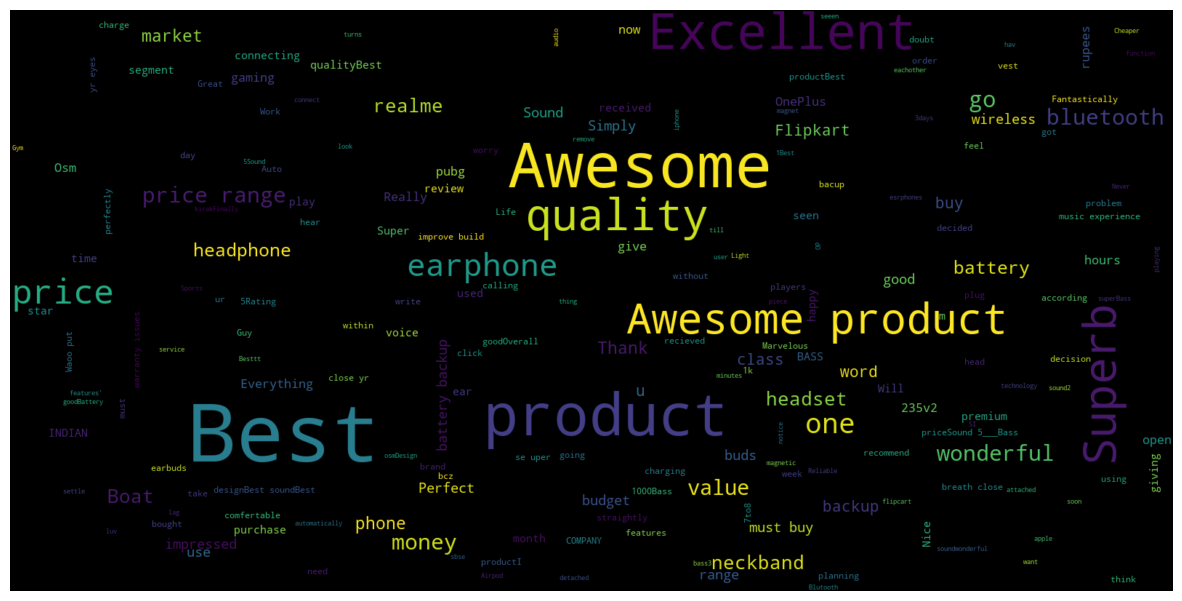

In [ ]:
from wordcloud import WordCloud
consolidated = ' '.join(word for word in data['review'][data['Sentiment']==1].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

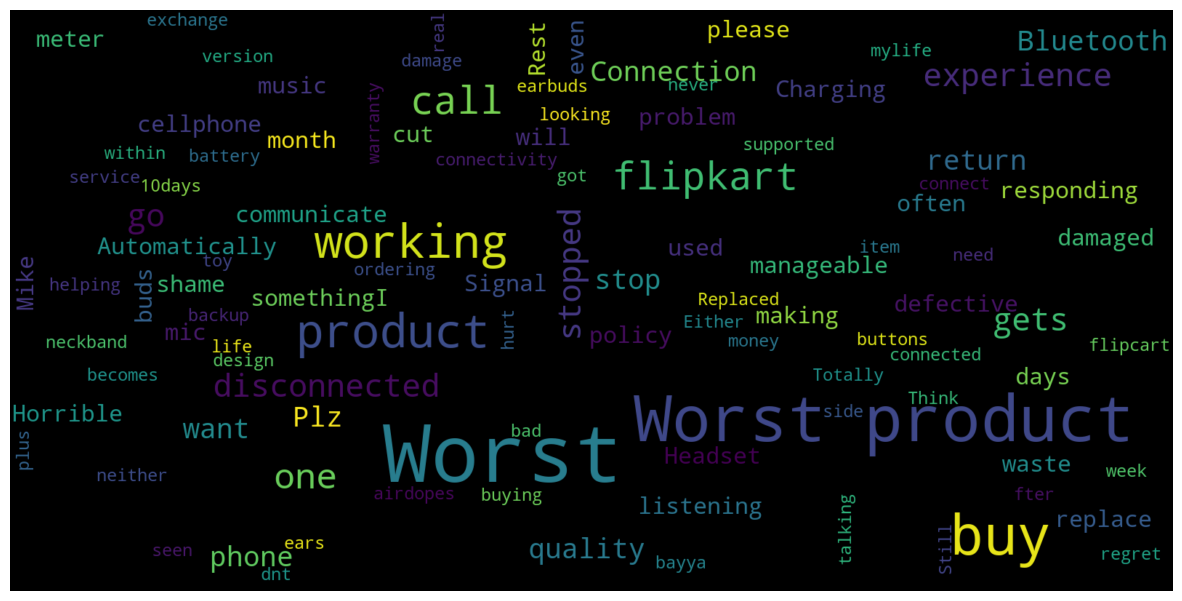

In [ ]:
from wordcloud import WordCloud

consolidated= ' '.join(word for word in data['review'][data ['Sentiment']==-1].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
text = 'this is the worst product I have ever used' 
sentiment = get_sentiment(text)
print(sentiment)


-1.0


In [ ]:
def predict_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating <= 2:
        return 'Negative'
    else:
        return 'Neutral'  # Optionally handle a neutral category if needed

# Apply the function to create a 'sentiment' column
data['sentiment'] = data['rating'].apply(predict_sentiment)

# Display the result
print(data)

      rating                                            summary  \
1          5                                  Terrific purchase   
2          5                                  Terrific purchase   
3          5                                             Super!   
4          5                                             Super!   
5          5                                  Terrific purchase   
6          5                                          Wonderful   
7          4                                        Pretty good   
8          5                                  Terrific purchase   
9          4                                         Delightful   
10         1                                          Worthless   
11         5                                     Simply awesome   
12         4                                        Good choice   
13         1                                   Terrible product   
14         1                                    Useless produc

In [ ]:
data = data.drop(['summary','upvotes','downvotes','BoAt BassHeads 100 Wired Headset','BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset','OnePlus Bullets Wireless Z Bass Edition Bluetooth Headset','OnePlus Bullets Wireless Z Bluetooth Headset','U&I Titanic Series - Low Price Bluetooth Neckband Bluetooth Headset','realme Buds 2 Wired Headset','realme Buds Q Bluetooth Headset','realme Buds Wireless Bluetooth Headset'], axis=1)

In [ ]:
data.to_csv('results2.csv', index=False)

In [ ]:
data.head(5)

rating                                             review  Sentiment  \
1       5  1-more flexible2-bass is very high3-sound clar...   0.268182   
2       5     Super sound and good looking I like that prize   0.477778   
3       5  Very much satisfied with the device at this pr...   0.536111   
4       5  Nice headphone, bass was very good and sound i...   0.346000   
5       5  Sound quality super battery backup super quali...   0.346667   

  sentiment  
1  Positive  
2  Positive  
3  Positive  
4  Positive  
5  Positive

In [ ]:
# data['Result'] = data['review'].apply(len)
# data['Result'] = sentiment
# data.to_csv('results.csv', index= False)
# data.head(335)

In [ ]:
sentiment_map = {'Positive' : 1, 'Negative' : -1}
data['sentiment'] = data['sentiment'].map(sentiment_map)

In [ ]:
data

In [ ]:
Positive = data[data['sentiment']==1]
Negative = data[data['sentiment']==-1]


In [ ]:
Positive

In [ ]:
Negative

<Axes: xlabel='rating', ylabel='count'>

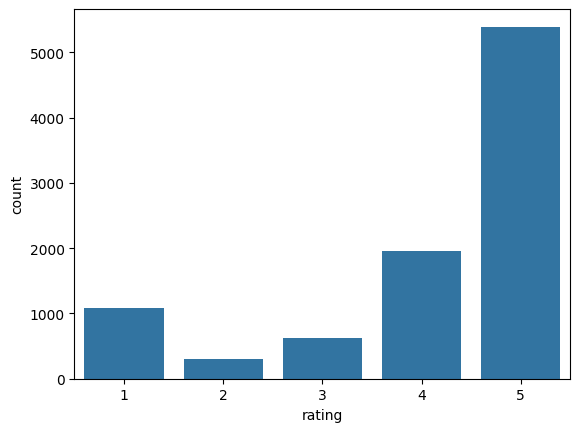

In [ ]:
sns.countplot(x = 'rating', data = data)

<Axes: xlabel='sentiment', ylabel='count'>

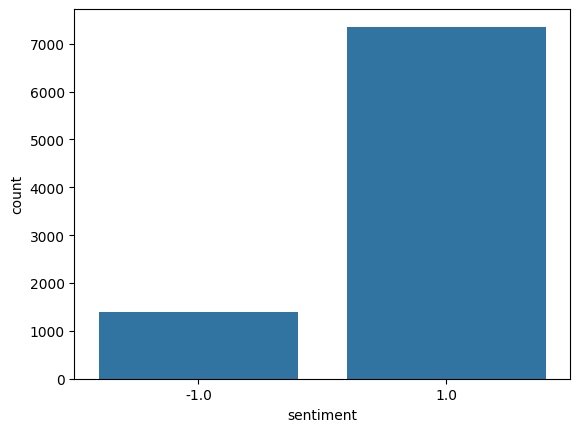

In [ ]:
sns.countplot(x= 'sentiment', data = data)

In [ ]:
# input_data = data.drop(['sentiment'], axis=1)

In [ ]:
# target = data['sentiment']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(input_data, target, test_size=0.2)

# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

In [ ]:
data.head(5)

rating                                             review  Sentiment  \
1       5  1-more flexible2-bass is very high3-sound clar...   0.268182   
2       5     Super sound and good looking I like that prize   0.477778   
3       5  Very much satisfied with the device at this pr...   0.536111   
4       5  Nice headphone, bass was very good and sound i...   0.346000   
5       5  Sound quality super battery backup super quali...   0.346667   

   sentiment  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
5        1.0

Machine Learning Modelling

1. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


X = data['review']
y = data['sentiment']

# Check shapes of X and y
print("Original shapes: X:", X.shape, "y:", y.shape)
data.dropna(subset=['sentiment'], inplace=True)

# Reassign X and y after dropping NaN values
X = data['review']
y = data['sentiment']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a CountVectorizer instance (assuming text data)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Check shapes after vectorization
print("Shapes after vectorization: X_train_vectorized:", X_train_vectorized.shape, "y_train:", y_train.shape)

Original shapes: X: (9374,) y: (9374,)
Shapes after vectorization: X_train_vectorized: (7001, 6816) y_train: (7001,)


In [ ]:
# Initialize a Naive Bayes classifier
NB_classifier = MultinomialNB()

# Train the classifier
NB_classifier.fit(X_train_vectorized, y_train)

# Now you can make predictions on the training set
y_predict_train = NB_classifier.predict(vectorizer.transform(X_train))

# Display predictions
print(y_predict_train)


[ 1.  1.  1. ...  1.  1. -1.]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

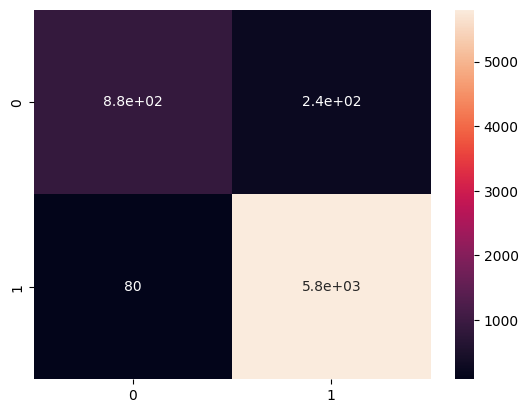

In [ ]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

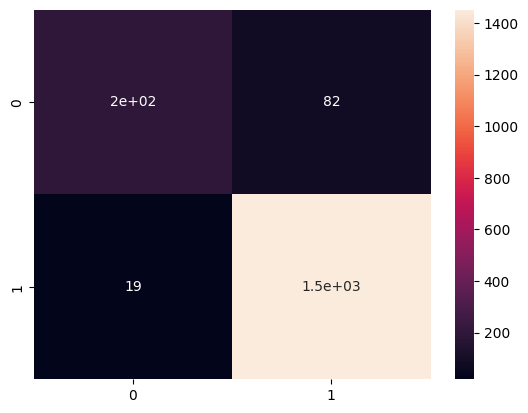

In [ ]:
y_predict_test = NB_classifier.predict(vectorizer.transform(X_test))
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

        -1.0       0.91      0.71      0.80       280
         1.0       0.95      0.99      0.97      1471

    accuracy                           0.94      1751
   macro avg       0.93      0.85      0.88      1751
weighted avg       0.94      0.94      0.94      1751



2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(vectorizer.transform(X_test))

In [ ]:
y_pred

array([ 1.,  1.,  1., ..., -1.,  1.,  1.])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Accuracy {} %'. format(100 * accuracy_score(y_pred, y_test)))

Accuracy 94.28897772701313 %


<Axes: >

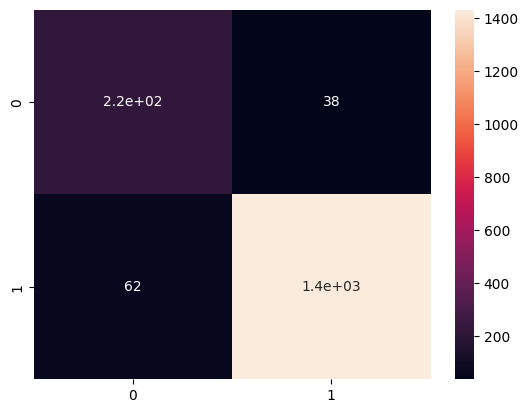

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        -1.0       0.78      0.85      0.81       256
         1.0       0.97      0.96      0.97      1495

    accuracy                           0.94      1751
   macro avg       0.88      0.91      0.89      1751
weighted avg       0.95      0.94      0.94      1751



3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
RandomForest_classifier = RandomForestClassifier()
RandomForest_classifier.fit(X_train_vectorized, y_train)

RandomForestClassifier()

In [ ]:
y_train_pred = RandomForest_classifier.predict(vectorizer.transform(X_train))

In [ ]:
y_test_pred = RandomForest_classifier.predict(vectorizer.transform(X_test))

In [ ]:
print('Accuracy {} '. format(100 * accuracy_score(y_train, y_train_pred)))

Accuracy 99.90001428367377 


In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

        -1.0       1.00      0.99      1.00      1118
         1.0       1.00      1.00      1.00      5883

    accuracy                           1.00      7001
   macro avg       1.00      1.00      1.00      7001
weighted avg       1.00      1.00      1.00      7001



In [ ]:
print('Accuracy {} '. format(100 * accuracy_score(y_test, y_test_pred)))

Accuracy 95.65962307252998 


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        -1.0       0.93      0.79      0.85       280
         1.0       0.96      0.99      0.97      1471

    accuracy                           0.96      1751
   macro avg       0.94      0.89      0.91      1751
weighted avg       0.96      0.96      0.96      1751



4. K-Nearest Algorithm

In [ ]:
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
KNN_Classifier = KNeighborsClassifier()
KNN_Classifier.fit(X_train_vectorized, y_train)

KNeighborsClassifier()

In [ ]:
y_trainpred_KNN = KNN_Classifier.predict(vectorizer.transform(X_train)) 

In [ ]:
y_testpred_KNN = KNN_Classifier.predict(vectorizer.transform(X_test))

In [ ]:
print('Accuracy {} '. format(100 * accuracy_score(y_train, y_trainpred_KNN)))

Accuracy 93.65804885016426 


In [ ]:
print(classification_report(y_train,y_trainpred_KNN))

              precision    recall  f1-score   support

        -1.0       0.92      0.66      0.77      1118
         1.0       0.94      0.99      0.96      5883

    accuracy                           0.94      7001
   macro avg       0.93      0.83      0.87      7001
weighted avg       0.94      0.94      0.93      7001



In [ ]:
print('Accuracy {} '. format(100 * accuracy_score(y_test, y_testpred_KNN)))

Accuracy 92.46145059965734 


In [ ]:
print(classification_report(y_test,y_testpred_KNN))

              precision    recall  f1-score   support

        -1.0       0.89      0.60      0.72       280
         1.0       0.93      0.99      0.96      1471

    accuracy                           0.92      1751
   macro avg       0.91      0.79      0.84      1751
weighted avg       0.92      0.92      0.92      1751



In [ ]:
data['sentiment'].value_counts()

sentiment
 1.0    7354
-1.0    1398
Name: count, dtype: int64

In [ ]:
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors   import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Defining a memory object to cache Intermediate results

cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

# 2. Defining the pipleine for data preprocessing and model building
# Create pipelines for different algorithms
pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'random_forest': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', RandomForestClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory),
    'knn': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', KNeighborsClassifier())
    ], memory=memory)
}

# Define parameter grids for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization__max_features': [1500, 2000, 2500], 
            'classifier__alpha': [1, 10]
        }
    ],
    'random_forest': [
        {
            'vectorization__max_features': [1500, 2000, 2500],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization__max_features': [1500, 2000, 2500], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'knn': [
        {
            'vectorization__max_features': [1500, 2000, 2500], 
            'classifier__n_neighbors': [3, 5, 7],
            'classifier__weights': ['uniform', 'distance']
        }
    ]
}

# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*" * 10, algo, "*" * 10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1',  
                               return_train_score=True,
                               verbose=1)
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, pos_label=1.0)  
    print('F1 Score on Test Data:', f1)

********** naive_bayes **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: total: 3.41 s
Wall time: 4.04 s
F1 Score on Test Data: 0.963212959838002
********** random_forest **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 1min 9s
Wall time: 1min 26s
F1 Score on Test Data: 0.9737373737373737
********** logistic_regression **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 3min 35s
Wall time: 4min 19s
F1 Score on Test Data: 0.9617790132036136
********** knn **********
Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 1min 32s
Wall time: 1min 54s
F1 Score on Test Data: 0.9642147117296223


In [ ]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', MultinomialNB(alpha=1))])

random_forest
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=1500)),
                ('classifier', RandomForestClassifier())])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2500)),
                ('classifier',
                 LogisticRegression(C=10, class_weight='balanced', l1_ratio=0.4,
                                    penalty='elasticnet', solver='saga'))])

knn
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('vectorization', CountVectorizer(max_features=2000)),
                ('classifier', KNeighborsClassifier(weights='distance'))])



In [ ]:
import joblib 
import os
from sklearn.metrics import f1_score
save_dir = 'Predictive_model'  
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, os.path.join(save_dir, f'{name}.pkl'))
    loaded_model = joblib.load(os.path.join(save_dir, f'{name}.pkl'))
    
    %time y_test_pred = loaded_model.predict(X_test)

    f1 = f1_score(y_test, y_test_pred, pos_label=1.0)

    print("F1 Score (Positive Class):", f1)
    print("Model Size:", os.path.getsize(os.path.join(save_dir, f'{name}.pkl')), "Bytes")  

********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 29.8 ms
F1 Score (Positive Class): 0.963212959838002
Model Size: 147223 Bytes
********** random_forest **********
CPU times: total: 31.2 ms
Wall time: 66.3 ms
F1 Score (Positive Class): 0.9737373737373737
Model Size: 14786705 Bytes
********** logistic_regression **********
CPU times: total: 15.6 ms
Wall time: 22.1 ms
F1 Score (Positive Class): 0.9617790132036136
Model Size: 140282 Bytes
********** knn **********
CPU times: total: 219 ms
Wall time: 323 ms
F1 Score (Positive Class): 0.9642147117296223
Model Size: 1557420 Bytes


In [ ]:
text = 'this is worst comment I have ever seen' 
rating = 1
sentiment = predict_sentiment(rating)
print(sentiment)

Negative


Deep Learning using TF and Keras


In [ ]:
from sre_parse import Tokenizer

X = data['review']
y = data['sentiment']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(X_train)
sequence_train=tokenizer.texts_to_sequences(X_train)
sequence_test=tokenizer.texts_to_sequences(X_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 7604 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(7001, 104)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(1751, 104)

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 104)]             0         
                                                                 
 embedding (Embedding)       (None, 104, 20)           152100    
                                                                 
 conv1d (Conv1D)             (None, 102, 32)           1952      
                                                                 
 max_pooling1d (MaxPooling1  (None, 34, 32)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 10, 64)            0         
 g1D)                                                      

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)


Epoch 1/5



InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3046, in run_cell

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3101, in _run_cell

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3306, in run_cell_async

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3488, in run_ast_nodes

  File "C:\Users\91759\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3548, in run_code

  File "C:\Users\91759\AppData\Local\Temp\ipykernel_7604\3463060383.py", line 2, in <module>

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "c:\Users\91759\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of -1 which is outside the valid range of [0, 5).  Label values: 1 1 1 -1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 -1 1 -1 1 1 -1 1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 -1 1 1 1 1 1 1 1 1 -1 1 1 1 1 1 1 1 1 1 1 -1 1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 -1 1 1 1 -1 1 1 -1 1 1 1 1 1 -1 1 1 1 1
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1479]

In [ ]:
y_pred=model.predict(data_test)
y_pred


ValueError: You must call `compile()` before using the model.

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
# Example prediction
text = "This product exceeded my expectations!"
sequence = tokenizer.texts_to_sequences([text])
padded_sequence = pad_sequences(sequence, maxlen=max_len)
prediction = model.predict(padded_sequence)
print(f'Sentiment prediction: {prediction[0][0]}')  # Example output
